# Workshop 2 - Apply
    
In this notebook you will solve a 2-element frame at the end of the notebook.

Our matrix method implementation is now completely stored in a local package, consisting of three classes.

## Two-element frame

<figure>
  <IMG SRC="https://raw.githubusercontent.com/ibcmrocha/public/main/twoelemframe.png" WIDTH=300 ALIGN="center">
</figure>

With:
- $EI = 1500$
- $EA = 1000$
- $q = 9$
- $L = 5$
- $\bar\varphi = 0.15$

The final example of this notebook is the two-element frame above. Here you should make use of all the new code you implemented:
    
- Set up the problem and compute a solution for `u_free`. Remember to consider the prescribed horizontal displacement $\bar{u}$ at the right end of the structure.
- Compute and plot bending moment lines for both elements (in the local and global coordinate systems)
- Compute reactions at both supports

In [1]:
import numpy as np
import matrixmethod as mm
%config InlineBackend.figure_formats = ['svg']

In [2]:
EI = 1500
EA = 1000
q = 9
L = 5
phibar = 0.15

mm.Node.clear()
mm.Element.clear()

nodes = []

nodes.append(mm.Node(0,0))
nodes.append(mm.Node(L,-L))
nodes.append(mm.Node(2*L,0))

elems = []

elems.append(mm.Element(nodes[0], nodes[1]))
elems.append(mm.Element(nodes[1], nodes[2]))

section = {}
section['EI'] = EI
section['EA'] = EA

for elem in elems:
    elem.set_section(section)
    print(elem)

con = mm.Constrainer()

con.fix_dof (nodes[0], 0)
con.fix_dof (nodes[0], 1)
con.fix_dof (nodes[2], 0)
con.fix_dof (nodes[2], 1)
con.fix_dof (nodes[2], 2, phibar)

elems[0].add_distributed_load([0,q])
elems[1].add_distributed_load([0,2*q])

print(con)

global_k = np.zeros ((3*len(nodes), 3*len(nodes)))
global_f = np.zeros (3*len(nodes))

for e in elems:
    elmat = e.stiffness()
    idofs = e.global_dofs()
    
    global_k[np.ix_(idofs,idofs)] += elmat

for n in nodes:
    global_f[n.dofs] += n.p

Kc, Fc = con.constrain ( global_k, global_f )
u_free = np.matmul ( np.linalg.inv(Kc), Fc )
print(u_free)

print(con.support_reactions(global_k,u_free,global_f))

Element connecting:
node #1:
 This node has:
 - x coordinate=0,
 - z coordinate=0,
 - degrees of freedom=[0, 1, 2],
 - load vector=[0. 0. 0.]
with node #2:
 This node has:
 - x coordinate=5,
 - z coordinate=-5,
 - degrees of freedom=[3, 4, 5],
 - load vector=[0. 0. 0.]
Element connecting:
node #1:
 This node has:
 - x coordinate=5,
 - z coordinate=-5,
 - degrees of freedom=[3, 4, 5],
 - load vector=[0. 0. 0.]
with node #2:
 This node has:
 - x coordinate=10,
 - z coordinate=0,
 - degrees of freedom=[6, 7, 8],
 - load vector=[0. 0. 0.]
This constrainer has constrained the degrees of freedom: [0, 1, 6, 7, 8] with corresponding constrained values: [0, 0, 0, 0, 0.15])
[-0.09274451 -0.13310939  0.51159348 -0.01644455]
[ 27.35024439 -63.82451092  17.64975561 -71.17548908 -36.75489076]


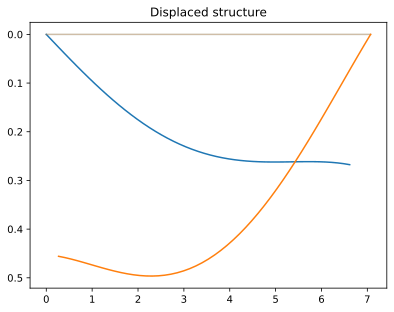

In [3]:
for elem in elems:
    u_elem = con.full_disp(u_free)[elem.global_dofs()]
    elem.plot_displaced(u_elem,num_points=51,global_c=False,scale=1)

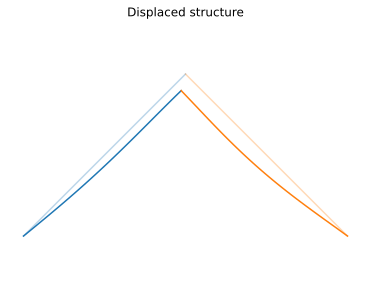

In [4]:
for elem in elems:
    u_elem = con.full_disp(u_free)[elem.global_dofs()]
    elem.plot_displaced(u_elem,num_points=51,global_c=True,scale=1)

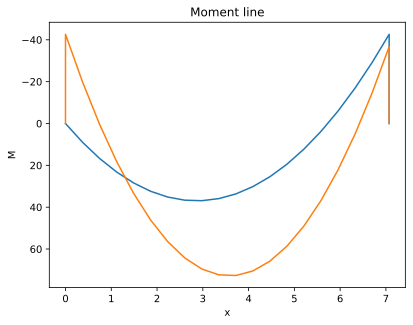

In [5]:
for elem in elems:
    u_elem = con.full_disp(u_free)[elem.global_dofs()]
    elem.plot_moment_diagram(u_elem,num_points=20,global_c=False)

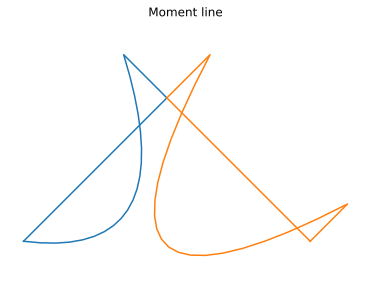

In [6]:
for elem in elems:
    u_elem = con.full_disp(u_free)[elem.global_dofs()]
    elem.plot_moment_diagram(u_elem,num_points=20,global_c=True,scale=0.05)

For the given parameter values, if your implementation is fully correct, you should get the following nodal displacements and support reactions:
$$
\mathbf{u}_\mathrm{free} = \left[-0.09274451, -0.13310939,  0.51159348, -0.01644455\right]
$$

$$
\mathbf{f}_\mathrm{cons} = \left[27.35024439, -63.82451092,  17.64975561, -71.17548908, -36.75489076\right]
$$

You should also get the following moment lines for the two elements:

- in local coordinate system:
![](https://raw.githubusercontent.com/ibcmrocha/public/main/moments_local.svg)

- in global coordinate system:
![](https://raw.githubusercontent.com/ibcmrocha/public/main/moments_global.svg)

And the following displacements:
- in local coordinate system:
![](https://raw.githubusercontent.com/ibcmrocha/public/main/displacements_local.svg)

- in global coordinate system:
![](https://raw.githubusercontent.com/ibcmrocha/public/main/displacements_global.svg)